In [3]:
#installing the neccessary packages
!pip install pmdarima

#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose




In [4]:
dataset = pd.read_csv('candy_production.csv', index_col = 0,parse_dates = [0], squeeze = True)

In [5]:
dataset.head()

observation_date
1972-01-01    85.6945
1972-02-01    71.8200
1972-03-01    66.0229
1972-04-01    64.5645
1972-05-01    65.0100
Name: IPG3113N, dtype: float64

In [6]:
type(dataset[0])

numpy.float64

In [7]:
dataset.head(10)

observation_date
1972-01-01     85.6945
1972-02-01     71.8200
1972-03-01     66.0229
1972-04-01     64.5645
1972-05-01     65.0100
1972-06-01     67.6467
1972-07-01     69.0429
1972-08-01     70.8370
1972-09-01     75.0462
1972-10-01    106.9289
Name: IPG3113N, dtype: float64

In [8]:
upsampled_dataset = dataset.resample('M').asfreq()
upsampled_dataset.head(10)

observation_date
1972-01-31   NaN
1972-02-29   NaN
1972-03-31   NaN
1972-04-30   NaN
1972-05-31   NaN
1972-06-30   NaN
1972-07-31   NaN
1972-08-31   NaN
1972-09-30   NaN
1972-10-31   NaN
Freq: M, Name: IPG3113N, dtype: float64

In [9]:
the_final_ds = upsampled_dataset + dataset
the_final_ds.head()

observation_date
1972-01-01   NaN
1972-01-31   NaN
1972-02-01   NaN
1972-02-29   NaN
1972-03-01   NaN
Name: IPG3113N, dtype: float64

In [10]:
the_final_ds[dataset.index] = dataset
#the_final_ds.plot()
the_final_ds.head()

observation_date
1972-01-01    85.6945
1972-01-31        NaN
1972-02-01    71.8200
1972-02-29        NaN
1972-03-01    66.0229
Name: IPG3113N, dtype: float64

In [11]:
interpolated = the_final_ds.interpolate(method='linear')
#interpolated.to_csv('final_candy_dataset.csv')
interpolated.head(), len(interpolated)

(observation_date
 1972-01-01    85.69450
 1972-01-31    78.75725
 1972-02-01    71.82000
 1972-02-29    68.92145
 1972-03-01    66.02290
 Name: IPG3113N, dtype: float64, 1096)

In [12]:
#Part 2  - This is starting the Exploratory Data analysis

#bringing in the dataset we are testing
this_dataset = pd.read_csv('final_candy_dataset.csv', index_col = 0,parse_dates = [0], squeeze = True)
this_dataset.head()

observation_date
1972-01-01    85.69450
1972-01-31    78.75725
1972-02-01    71.82000
1972-02-29    68.92145
1972-03-01    66.02290
Name: IPG3113N, dtype: float64

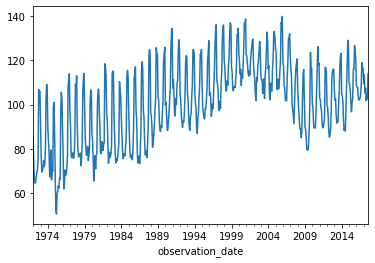

In [13]:
#A plotting of the Original dataset
dataset.plot()
plt.show()

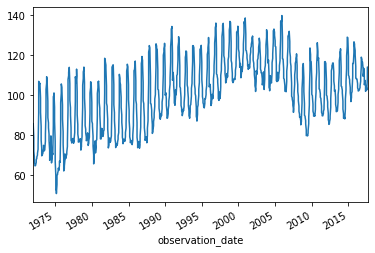

In [14]:
#a plotting of the new dataset
this_dataset.plot()
plt.show()

In [15]:
#Let us have a look at Quantitative metrics
dataset.describe()

count    548.000000
mean     100.662524
std       18.052931
min       50.668900
25%       87.862475
50%      102.278550
75%      114.691900
max      139.915300
Name: IPG3113N, dtype: float64

In [16]:
#doing EDA on the time series dataset
this_dataset.describe()

count    1096.000000
mean      100.675465
std        17.760245
min        50.668900
25%        88.084075
50%       102.379800
75%       114.093325
max       139.915300
Name: IPG3113N, dtype: float64

In [17]:
##We are vehemently seeing that the dataset is evenly distruibuted between each other 
#Now resampling to the year to see a General overview of how the demand was per year
this_dataset_year = this_dataset.resample('Y').mean() 
this_dataset_year.head()

observation_date
1972-12-31    79.631533
1973-12-31    83.131733
1974-12-31    80.024617
1975-12-31    71.603994
1976-12-31    81.839535
Freq: A-DEC, Name: IPG3113N, dtype: float64

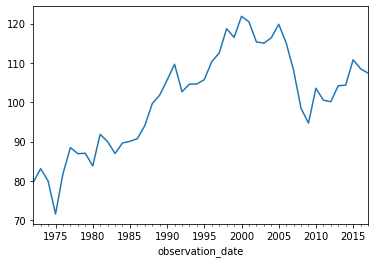

In [18]:
#plotting to see how the dataset was
this_dataset_year.plot()
plt.show()

In [19]:
#Now check how much each month
this_dataset_df = this_dataset.to_frame()
this_dataset_df.head()

,IPG3113N
observation_date,
1972-01-01,85.69450
1972-01-31,78.75725
1972-02-01,71.82000
1972-02-29,68.92145
1972-03-01,66.02290


In [20]:
this_dataset_df.index


DatetimeIndex(['1972-01-01', '1972-01-31', '1972-02-01', '1972-02-29',
               '1972-03-01', '1972-03-31', '1972-04-01', '1972-04-30',
               '1972-05-01', '1972-05-31',
               ...
               '2017-04-01', '2017-04-30', '2017-05-01', '2017-05-31',
               '2017-06-01', '2017-06-30', '2017-07-01', '2017-07-31',
               '2017-08-01', '2017-08-31'],
              dtype='datetime64[ns]', name='observation_date', length=1096, freq=None)

In [21]:
this_dataset_df['Month'] = this_dataset_df.index.month
this_dataset_df.head()

,IPG3113N,Month
observation_date,,
1972-01-01,85.69450,1
1972-01-31,78.75725,1
1972-02-01,71.82000,2
1972-02-29,68.92145,2
1972-03-01,66.02290,3


In [22]:
this_dataset_df.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['JAN', 'FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC'], inplace=True)

In [23]:
this_dataset_df.columns = ["Amount", "Month"]

In [24]:
this_dataset_df.head()

,Amount,Month
observation_date,,
1972-01-01,85.69450,JAN
1972-01-31,78.75725,JAN
1972-02-01,71.82000,FEB
1972-02-29,68.92145,FEB
1972-03-01,66.02290,MAR


In [27]:
the_groups = this_dataset_df.groupby("Month", sort=False)
final_values = the_groups.head()
the_groups.count()

,Amount
Month,
JAN,92
FEB,92
MAR,92
APR,92
MAY,92
JUNE,92
JULY,92
AUG,92
SEP,90


In [28]:
final_values.head()

,Amount,Month
observation_date,,
1972-01-01,85.69450,JAN
1972-01-31,78.75725,JAN
1972-02-01,71.82000,FEB
1972-02-29,68.92145,FEB
1972-03-01,66.02290,MAR


<Figure size 1600x800 with 0 Axes>

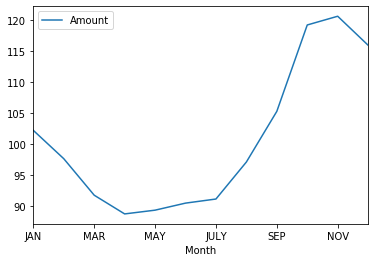

In [29]:
aggregation = {"Amount":"mean"}
final_values = the_groups.agg(aggregation)
#plt.xticks(['JAN', 'FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC'])
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

final_values.plot()
plt.show()

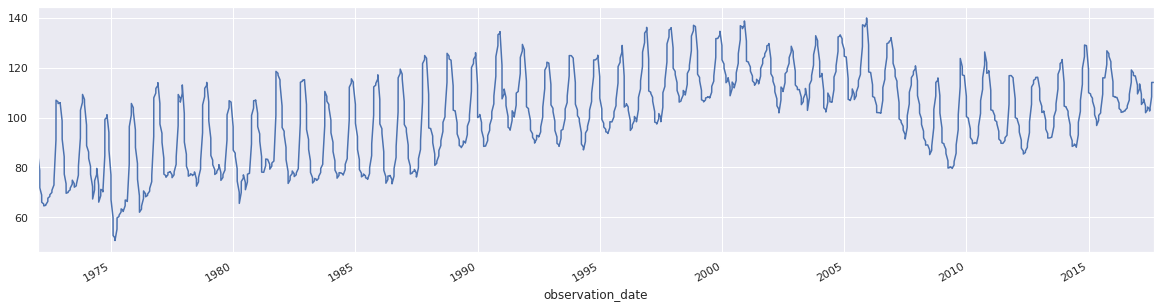

In [31]:
#doing more EDA on the resampled datas
sns.set(rc = {'figure.figsize':(20,5)})
this_dataset.plot()

In [33]:
#set the frequency
this_dataset.index

DatetimeIndex(['1972-01-01', '1972-01-31', '1972-02-01', '1972-02-29',
               '1972-03-01', '1972-03-31', '1972-04-01', '1972-04-30',
               '1972-05-01', '1972-05-31',
               ...
               '2017-04-01', '2017-04-30', '2017-05-01', '2017-05-31',
               '2017-06-01', '2017-06-30', '2017-07-01', '2017-07-31',
               '2017-08-01', '2017-08-31'],
              dtype='datetime64[ns]', name='observation_date', length=1096, freq=None)

In [39]:
dataset.index.freq = pd.infer_freq(dataset.index)

In [42]:
dataset.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01'],
              dtype='datetime64[ns]', name='observation_date', length=548, freq='MS')

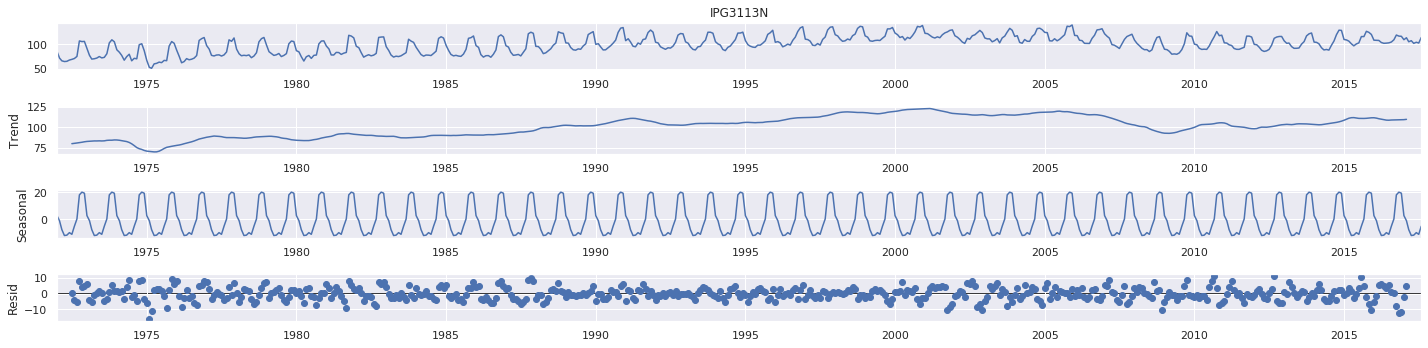

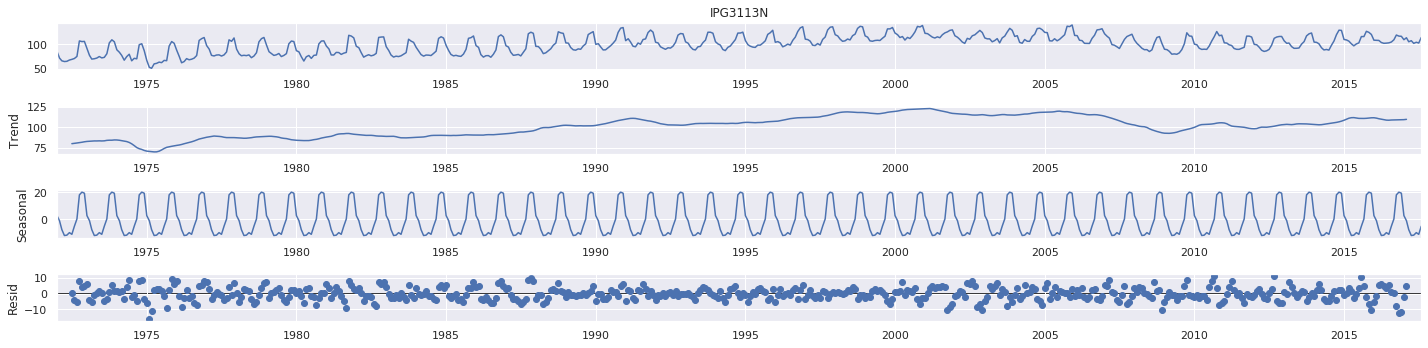

In [43]:
#let us perform Seasonl decomposition
result = seasonal_decompose(dataset)
sns.set(rc={'figure.figsize': (20,5)})
result.plot()

#there is a most likely a seasonal componenet in the data

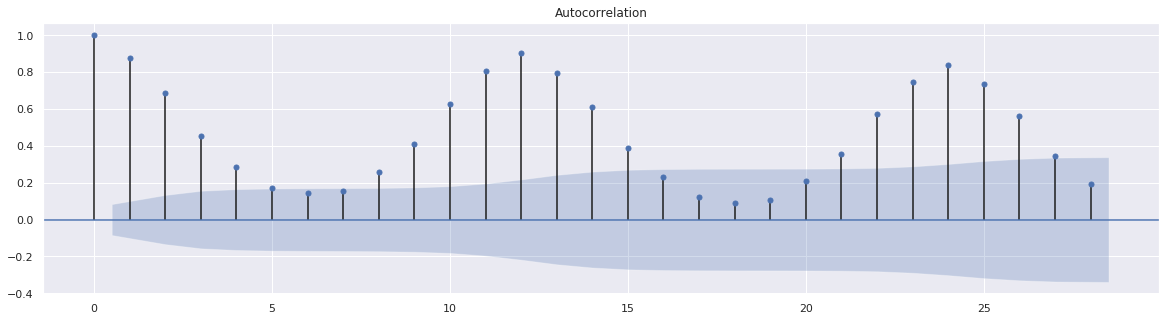

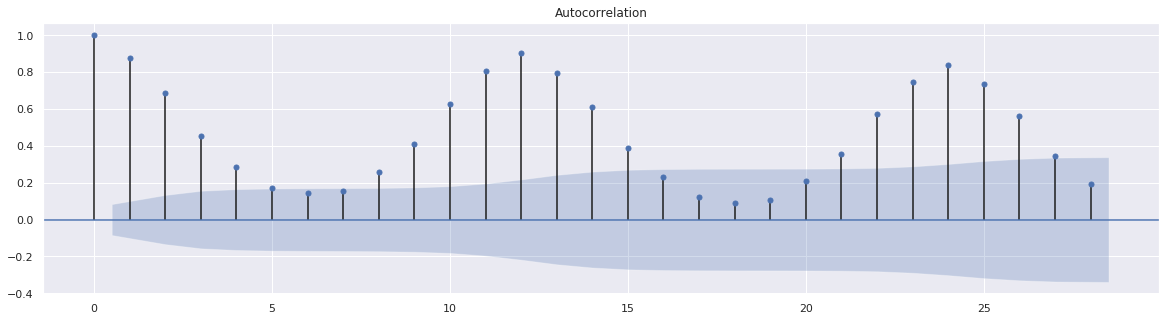

In [46]:
plot_acf(dataset)

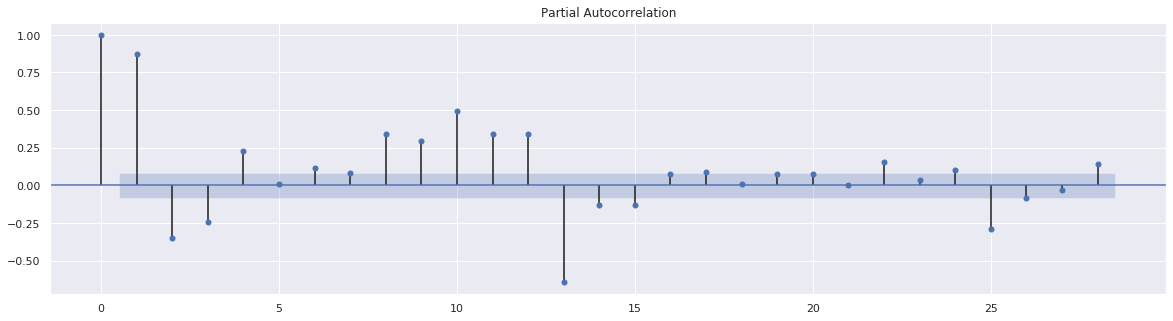

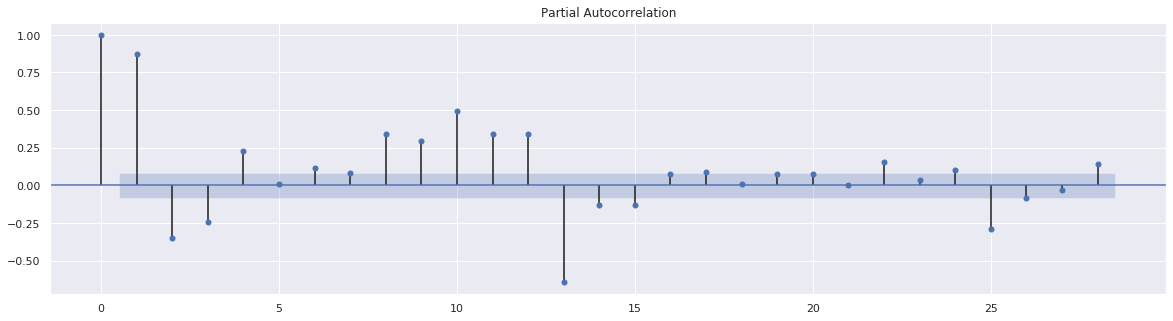

In [48]:
plot_pacf(dataset)

#from the acf plot we can clearly see that there is a trend reputation at every 12 months